<a href="https://www.kaggle.com/code/sreemontiduttabanik/global-warming?scriptVersionId=190934146" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Temperature Dataset Cleaning

In [2]:
os.listdir('../input/climate-change-earth-surface-temperature-data')

['GlobalTemperatures.csv',
 'GlobalLandTemperaturesByState.csv',
 'GlobalLandTemperaturesByCountry.csv',
 'GlobalLandTemperaturesByCity.csv',
 'GlobalLandTemperaturesByMajorCity.csv']

In [3]:
GloTemp=pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

In [4]:
print("FIRST FEW RECORDS:")
GloTemp.head()

FIRST FEW RECORDS:


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
GloTemp.shape

(3192, 9)

In [6]:
GloTemp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [7]:
GloTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [8]:
GloTemp.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [9]:
#Original data
GloTemp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [10]:
duplicate_rows=GloTemp[GloTemp.duplicated()]
print("No. of duplicate rows:",duplicate_rows.shape)

No. of duplicate rows: (0, 9)


In [11]:
GloTemp=GloTemp.drop_duplicates()
GloTemp.shape

(3192, 9)

In [12]:
#checking for null values
GloTemp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [13]:
#removing null values
GloTemp=GloTemp.dropna()
print("After removing rows with null data:")
GloTemp.count()

After removing rows with null data:


dt                                           1992
LandAverageTemperature                       1992
LandAverageTemperatureUncertainty            1992
LandMaxTemperature                           1992
LandMaxTemperatureUncertainty                1992
LandMinTemperature                           1992
LandMinTemperatureUncertainty                1992
LandAndOceanAverageTemperature               1992
LandAndOceanAverageTemperatureUncertainty    1992
dtype: int64

In [14]:
GloTemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [15]:
#Data after cleaning
GloTemp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [16]:
#Convert the celsius temperatures to farenheit
def convert_to_farenheit(temp):
    farenheit_temp=(temp*1.8)+32
    return farenheit_temp
temp_col=['LandAverageTemperature','LandMaxTemperature','LandMinTemperature','LandAndOceanAverageTemperature']
GloTemp[temp_col] = GloTemp[temp_col].apply(convert_to_farenheit)
GloTemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,33.3482,1.105,46.8356,1.738,26.2292,2.822,55.0994,0.367
1201,1850-02-01,37.5278,1.275,49.9460,3.007,27.8762,1.623,56.4584,0.414
1202,1850-03-01,40.9172,0.955,50.6246,2.401,28.5710,1.410,57.2774,0.341
1203,1850-04-01,44.9906,0.665,55.2812,1.004,33.8324,1.329,58.4006,0.267
1204,1850-05-01,50.0072,0.617,60.1790,2.406,38.8598,1.347,59.9126,0.249


In [17]:
#Convert 'dt' to datetime format
def convert_to_datetime(temp_df):
    temp_df=temp_df.copy()
    temp_df['dt']=pd.to_datetime(temp_df['dt'])
    temp_df['month']=temp_df['dt'].dt.month
    temp_df['Year']=temp_df['dt'].dt.year
    return temp_df

new_glo_temp=convert_to_datetime(GloTemp)
new_glo_temp=new_glo_temp.drop(['dt','month'], axis=1)    #axis value indicates rows(0) or columns(1) 
new_glo_temp=new_glo_temp.set_index('Year')
new_glo_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1850,33.3482,1.105,46.8356,1.738,26.2292,2.822,55.0994,0.367
1850,37.5278,1.275,49.9460,3.007,27.8762,1.623,56.4584,0.414
1850,40.9172,0.955,50.6246,2.401,28.5710,1.410,57.2774,0.341
1850,44.9906,0.665,55.2812,1.004,33.8324,1.329,58.4006,0.267
1850,50.0072,0.617,60.1790,2.406,38.8598,1.347,59.9126,0.249


# Temperature Dataset Visualization

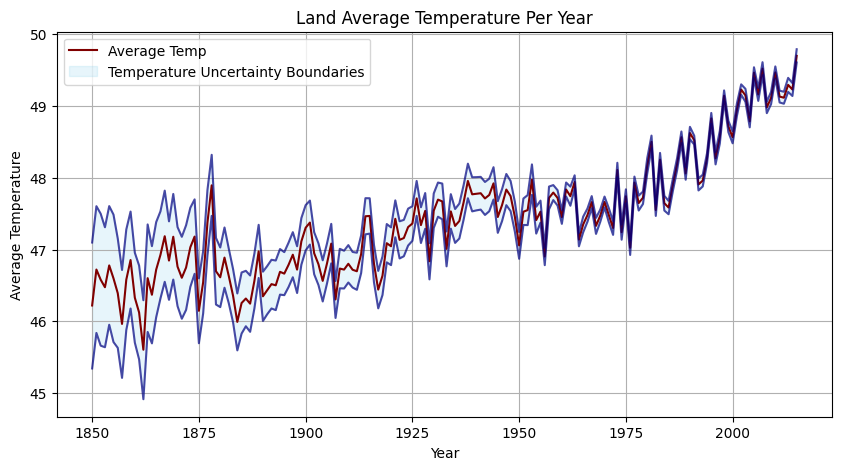

In [18]:
#Plotting the average land temperature with higher and lower bounds
def plot_avg_temp(df,col1,col2,label):
    cols=[col1,col2]
    temp_df=df[cols]
    average_temp_per_year=temp_df.groupby(temp_df.index)[cols].mean()
    average_temp_per_year['Higher_temp']=average_temp_per_year[col1]+average_temp_per_year[col2]
    average_temp_per_year['Lower_temp']=average_temp_per_year[col1]-average_temp_per_year[col2]
    
    plt.figure(figsize=(10,5))
    plt.plot(average_temp_per_year.index, average_temp_per_year[col1], color='maroon', label='Average Temp')
    plt.plot(average_temp_per_year.index, average_temp_per_year['Higher_temp'], color='navy', alpha=0.7)
    plt.plot(average_temp_per_year.index, average_temp_per_year['Lower_temp'], color='navy', alpha=0.7)
    plt.fill_between(average_temp_per_year.index, average_temp_per_year['Higher_temp'], average_temp_per_year['Lower_temp'], color='skyblue', alpha=0.2, label='Temperature Uncertainty Boundaries')
    
    plt.xlabel("Year")
    plt.ylabel("Average Temperature")
    plt.title(label)
    plt.legend(loc='best')
    plt.grid()

#call the function 
plot_avg_temp(new_glo_temp,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature Per Year')

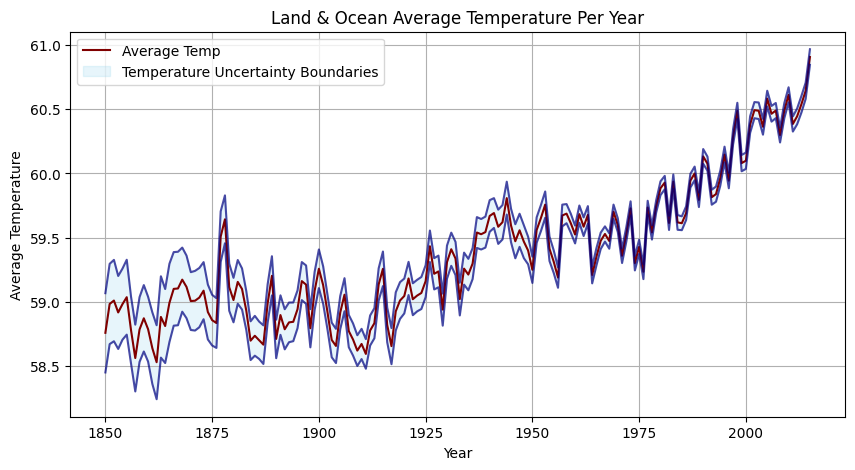

In [19]:
#Plotting the average land and ocean temperature with higher and lower bounds
def plot_land_ocean_avg_temp(df,col1,col2,label):
    cols=[col1,col2]
    temp_df=df[cols]
    average_temp_per_year=temp_df.groupby(temp_df.index)[cols].mean()
    average_temp_per_year['Higher_temp']=average_temp_per_year[col1]+average_temp_per_year[col2]
    average_temp_per_year['Lower_temp']=average_temp_per_year[col1]-average_temp_per_year[col2]
    
    plt.figure(figsize=(10,5))
    plt.plot(average_temp_per_year.index, average_temp_per_year[col1], color='maroon', label='Average Temp')
    plt.plot(average_temp_per_year.index, average_temp_per_year['Higher_temp'], color='navy', alpha=0.7)
    plt.plot(average_temp_per_year.index, average_temp_per_year['Lower_temp'], color='navy', alpha=0.7)
    plt.fill_between(average_temp_per_year.index, average_temp_per_year['Higher_temp'], average_temp_per_year['Lower_temp'], color='skyblue', alpha=0.2, label='Temperature Uncertainty Boundaries')
    
    plt.xlabel("Year")
    plt.ylabel("Average Temperature")
    plt.title(label)
    plt.legend(loc='best')
    plt.grid()

#call the function 
plot_avg_temp(new_glo_temp,'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty','Land & Ocean Average Temperature Per Year')

Text(0.5, 1.0, 'Average Land & Ocean Temperature in 40 Year Intervals')

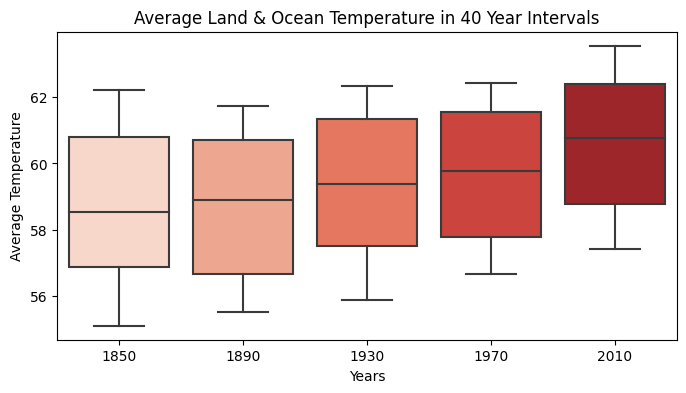

In [20]:
year_in_intervals = [1850, 1890, 1930, 1970, 2010]
temp_interval_df = new_glo_temp[new_glo_temp.index.isin(year_in_intervals)]
plt.figure(figsize=(8,4))
sns.boxplot(x=temp_interval_df.index, y=temp_interval_df['LandAndOceanAverageTemperature'], data =temp_interval_df, palette='Reds')
plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.title("Average Land & Ocean Temperature in 40 Year Intervals")

# Greenhouse Gas Emission dataset Cleaning

In [21]:
os.listdir('../input/annual-greenhouse-gas-emission-accounts/')

['Annual_Greenhouse_Gas_(GHG)_Air_Emissions_Accounts.csv']

In [22]:
ghg_df=pd.read_csv('../input/annual-greenhouse-gas-emission-accounts/Annual_Greenhouse_Gas_(GHG)_Air_Emissions_Accounts.csv')

In [23]:
ghg_df.head()
ghg_df.tail()
ghg_df.columns

Index(['ObjectId2', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Industry', 'Gas_Type',
       'Seasonal_Adjustment', 'Scale', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021',
       'F2022'],
      dtype='object')

In [24]:
ghg_df.isnull().sum()
ghg_df=ghg_df.drop(['ISO2','ISO3','Indicator','Unit','Source','CTS_Code','CTS_Name','CTS_Full_Descriptor','Seasonal_Adjustment','Scale'], axis=1)
ghg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ObjectId2  1186 non-null   int64  
 1   Country    1186 non-null   object 
 2   Industry   1186 non-null   object 
 3   Gas_Type   1186 non-null   object 
 4   F2010      1186 non-null   float64
 5   F2011      1186 non-null   float64
 6   F2012      1186 non-null   float64
 7   F2013      1186 non-null   float64
 8   F2014      1186 non-null   float64
 9   F2015      1186 non-null   float64
 10  F2016      1186 non-null   float64
 11  F2017      1186 non-null   float64
 12  F2018      1186 non-null   float64
 13  F2019      1186 non-null   float64
 14  F2020      1186 non-null   float64
 15  F2021      1186 non-null   float64
 16  F2022      1186 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 157.6+ KB


In [25]:
ghg_df.Country.unique()

array(['Advanced Economies', 'Africa', 'Americas', 'Asia',
       'Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Emerging and Developing Economies', 'Europe',
       'G20', 'G7', 'Latin America and the Caribbean', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Oceania',
       'Other Oceania sub-regions', 'South-eastern Asia', 'Southern Asia',
       'Southern Europe', 'Sub-Saharan Africa', 'Western Asia',
       'Western Europe', 'World'], dtype=object)

In [26]:
drop_rows=['Advanced Economies','Emerging and Developing Economies','G20','G7','Africa', 'Americas','Asia','World','Europe','Other Oceania sub-regions','Oceania']
ghg_df.drop(ghg_df[ghg_df['Country'].isin(drop_rows)].index, inplace = True)
ghg_df.Country.unique()

array(['Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Latin America and the Caribbean',
       'Northern Africa', 'Northern America', 'Northern Europe',
       'South-eastern Asia', 'Southern Asia', 'Southern Europe',
       'Sub-Saharan Africa', 'Western Asia', 'Western Europe'],
      dtype=object)

In [27]:
ghg_df.head()
ghg_df.set_index('ObjectId2')


,Country,Industry,Gas_Type,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
ObjectId2,,,,,,,,,,,,,,,,
308,Australia and New Zealand,"Agriculture, Forestry and Fishing",Carbon dioxide,11.344849,11.575843,11.752574,11.869420,12.203448,12.556313,12.909154,13.646617,13.606811,12.527634,11.888421,11.564206,11.788493
309,Australia and New Zealand,"Agriculture, Forestry and Fishing",Fluorinated gases,0.004007,0.004593,0.004694,0.005185,0.005849,0.005866,0.006068,0.006704,0.007374,0.007041,0.007945,0.007814,0.007738
310,Australia and New Zealand,"Agriculture, Forestry and Fishing",Greenhouse gas,121.949190,127.587088,130.240422,130.808020,131.577289,128.241595,127.061452,131.666478,130.773851,124.052531,121.034872,121.814280,125.018266
311,Australia and New Zealand,"Agriculture, Forestry and Fishing",Methane,92.506637,96.634693,98.594146,99.194018,98.833316,95.734274,94.060788,96.461486,96.620689,92.017904,89.424551,90.518837,93.081512
312,Australia and New Zealand,"Agriculture, Forestry and Fishing",Nitrous oxide,18.093697,19.371960,19.889007,19.739397,20.534675,19.945142,20.085442,21.551671,20.538976,19.499952,19.713955,19.723423,20.140524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,Western Europe,"Water supply; sewerage, waste management and r...",Carbon dioxide,23.232651,23.812400,25.457599,25.239471,21.218800,20.800454,21.170775,21.171700,20.838649,20.891084,20.132500,21.273279,20.807002
1252,Western Europe,"Water supply; sewerage, waste management and r...",Fluorinated gases,3.109694,3.423869,3.975961,4.153123,4.399324,4.828842,5.344370,5.922626,6.352539,6.416005,5.630080,4.900401,4.804195
1253,Western Europe,"Water supply; sewerage, waste management and r...",Greenhouse gas,71.539788,70.385878,70.562717,68.993125,63.287124,60.973578,60.745624,60.634479,59.325890,59.340408,56.532290,56.309288,55.410824


In [28]:
ghg_df.Industry.unique()
ghg_df.dropna()
ghg_df.head()

,ObjectId2,Country,Industry,Gas_Type,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
188,308,Australia and New Zealand,"Agriculture, Forestry and Fishing",Carbon dioxide,11.344849,11.575843,11.752574,11.869420,12.203448,12.556313,12.909154,13.646617,13.606811,12.527634,11.888421,11.564206,11.788493
189,309,Australia and New Zealand,"Agriculture, Forestry and Fishing",Fluorinated gases,0.004007,0.004593,0.004694,0.005185,0.005849,0.005866,0.006068,0.006704,0.007374,0.007041,0.007945,0.007814,0.007738
190,310,Australia and New Zealand,"Agriculture, Forestry and Fishing",Greenhouse gas,121.949190,127.587088,130.240422,130.808020,131.577289,128.241595,127.061452,131.666478,130.773851,124.052531,121.034872,121.814280,125.018266
191,311,Australia and New Zealand,"Agriculture, Forestry and Fishing",Methane,92.506637,96.634693,98.594146,99.194018,98.833316,95.734274,94.060788,96.461486,96.620689,92.017904,89.424551,90.518837,93.081512
192,312,Australia and New Zealand,"Agriculture, Forestry and Fishing",Nitrous oxide,18.093697,19.371960,19.889007,19.739397,20.534675,19.945142,20.085442,21.551671,20.538976,19.499952,19.713955,19.723423,20.140524


In [29]:
ghg_df['Industry'].value_counts()

Industry
Manufacturing                                                          70
Other Services Industries                                              70
Total Industry and Households                                          70
Transportation and Storage                                             67
Total Households                                                       66
Agriculture, Forestry and Fishing                                      63
Construction                                                           63
Electricity, Gas, Steam and Air Conditioning Supply                    63
Mining                                                                 63
Water supply; sewerage, waste management and remediation activities    63
Name: count, dtype: int64

# Greenhouse Gas Emission dataset Visualization

Text(0.5, 1.0, 'Sources Of Greenhouse Gas Emission')

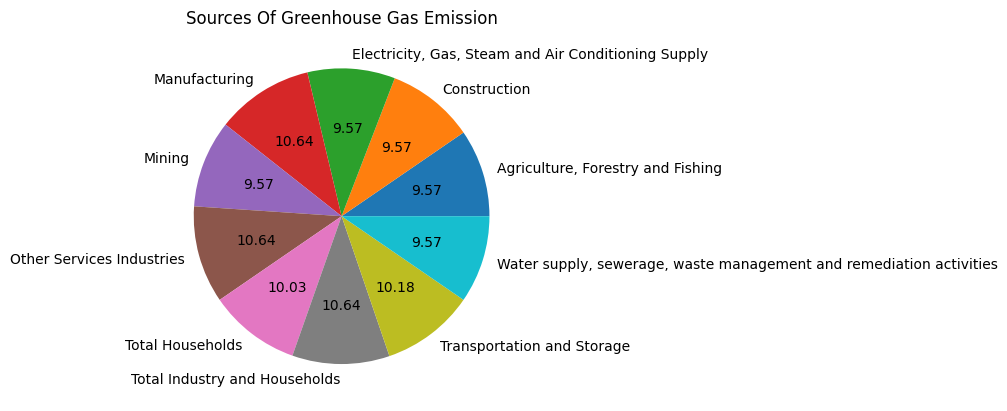

In [30]:
#Sources of emission

plt.figure()
val=[63,63,63,70,63,70,66,70,67,63]
var=['Agriculture, Forestry and Fishing', 'Construction',
       'Electricity, Gas, Steam and Air Conditioning Supply',
       'Manufacturing', 'Mining', 'Other Services Industries',
       'Total Households', 'Total Industry and Households',
       'Transportation and Storage',
       'Water supply, sewerage, waste management and remediation activities']
plt.pie(val,labels=var,autopct='%.2f')
plt.title("Sources Of Greenhouse Gas Emission")

In [31]:
#Average emmision df from 2010-2022
cols=['F2010','F2011','F2012','F2013','F2014','F2015','F2016','F2017','F2018','F2019','F2020','F2021','F2022']
avg_emm_df_og=ghg_df.groupby(['Gas_Type'])[cols].mean()
avg_emm_df=ghg_df.groupby(['Gas_Type'])[cols].mean()
avg_emm_df["Avg_Emission"]=avg_emm_df[cols].mean(axis=1)
avg_emm_clean=avg_emm_df.drop(avg_emm_df[avg_emm_df.index=='Greenhouse gas'].index)
avg_emm_clean.head()

,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,Avg_Emission
Gas_Type,,,,,,,,,,,,,,
Carbon dioxide,480.434886,495.875752,503.978153,513.418351,518.304517,515.283131,506.559145,515.833572,528.873985,528.645983,502.541172,531.104833,536.731948,513.660418
Fluorinated gases,12.402210,13.266258,14.422018,15.353075,16.591099,15.867704,16.474039,17.618201,18.793883,19.601734,20.506750,21.542003,22.906604,17.334275
Methane,136.678563,139.622021,141.057906,141.374123,142.227185,142.616116,142.921495,144.583333,146.822895,147.533262,146.266995,148.402445,151.146191,143.942502
Nitrous oxide,34.522225,35.055033,34.890793,35.995451,36.184837,36.333831,36.159172,36.282648,36.767863,37.197980,37.039507,37.680152,38.050529,36.320002


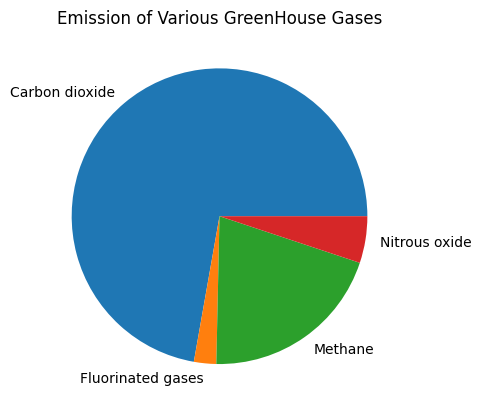

In [32]:
#Gas emission
plt.figure()
avg_emm=avg_emm_clean["Avg_Emission"].to_list()
plt.pie(avg_emm,labels=avg_emm_clean.index)
plt.title("Emission of Various GreenHouse Gases")
plt.show()

Text(0.5, 1.0, 'Year-wise level of Greenhouse Gases')

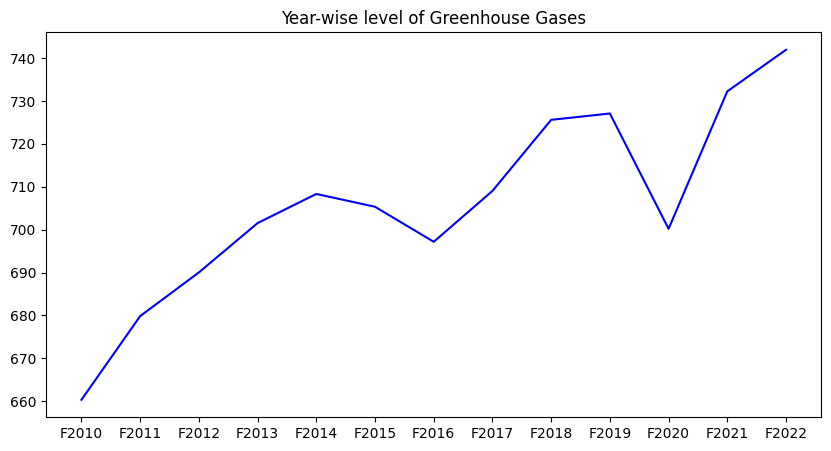

In [33]:
#Year-wise level of all Greenhouse Gases
years=['F2010','F2011','F2012','F2013','F2014','F2015','F2016','F2017','F2018','F2019','F2020','F2021','F2022']
row=avg_emm_df_og[avg_emm_df_og.index=='Greenhouse gas'].iloc[0]
row_list=row.tolist()
plt.figure(figsize=(10,5))
plt.plot(years,row_list, color="blue")
plt.title("Year-wise level of Greenhouse Gases")

# Prediction 

<Axes: >

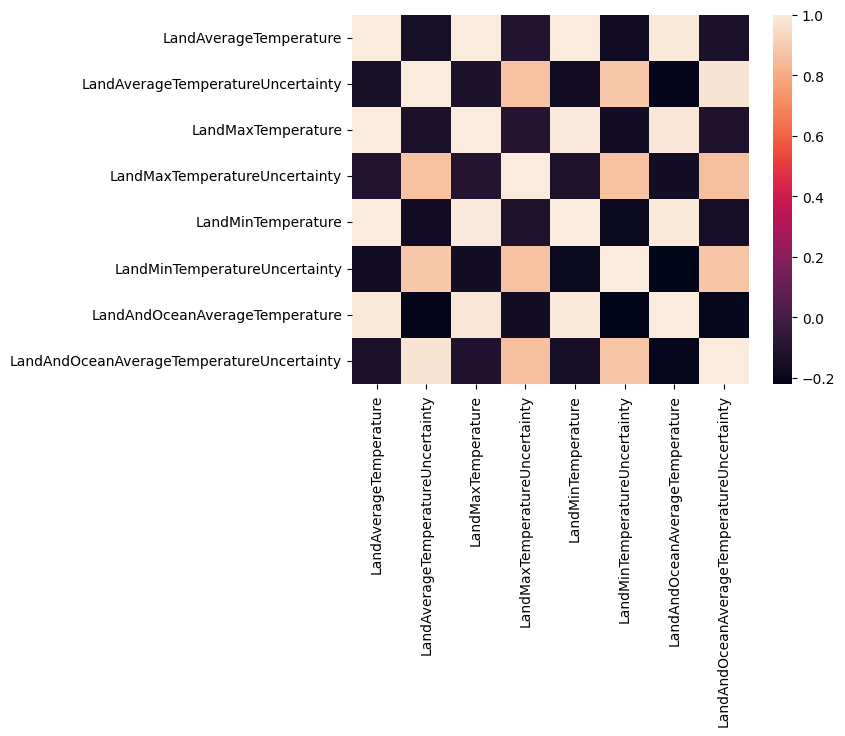

In [34]:
sns.heatmap(new_glo_temp.corr())

In [35]:
#Train Linear Regression Model
new_glo_temp=new_glo_temp.reset_index()
cols=['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']
new_glo_temp=new_glo_temp.groupby(new_glo_temp['Year'])[cols].mean()
new_glo_temp=new_glo_temp.reset_index()
new_glo_temp.head()
X = new_glo_temp[['Year','LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperatureUncertainty']]
y = new_glo_temp['LandAndOceanAverageTemperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R2:", train_r2)
print("Testing R2:", test_r2)

Training MSE: 0.01195821788236253
Testing MSE: 0.014609189370365098
Training R2: 0.9616602362394684
Testing R2: 0.9199557647755233


Text(0.5, 1.0, 'Actual vs Predicted Land & Ocean Average Temperature')

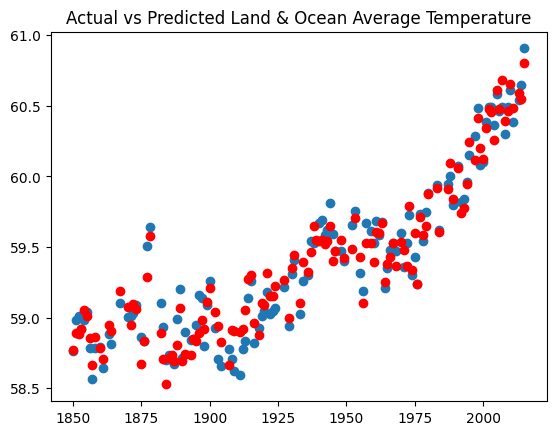

In [36]:
#Visualize the prediction against actual data
plt.scatter(X_train['Year'],y_train)
plt.scatter(X_train['Year'],y_pred_train, color="red")
plt.title("Actual vs Predicted Land & Ocean Average Temperature")

Text(0.5, 1.0, 'Test vs Predicted Land & Ocean Average Temperature')

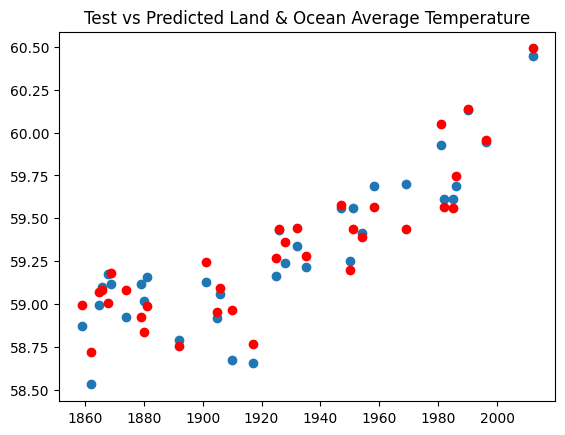

In [37]:
#Visualize the prediction against test data
plt.scatter(X_test['Year'],y_test)
plt.scatter(X_test['Year'],y_pred_test, color="red")
plt.title("Test vs Predicted Land & Ocean Average Temperature")